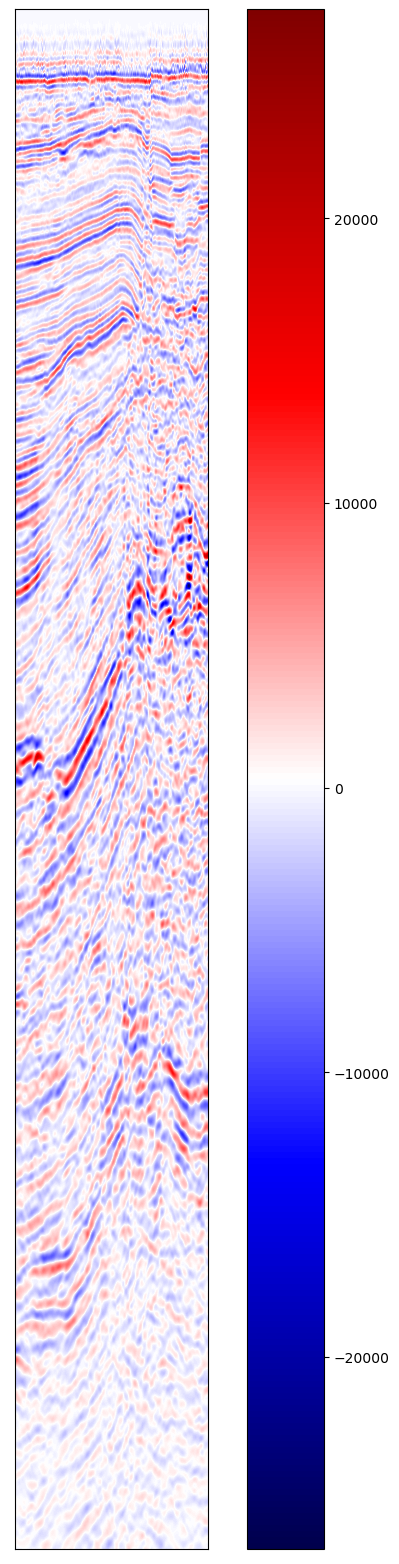

In [1]:
import segyio
import matplotlib.pyplot as plt

dir_parent = 'C:/Users/ACER/Downloads/ONEJ2.sgy'
seismic_data = segyio.tools.cube(dir_parent)

fig = plt.figure(figsize=(10,20))
ax = fig.subplots()
sim = ax.imshow(seismic_data[:,0,:].T, cmap=plt.cm.seismic)
fig.colorbar(sim, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

In [1]:
import obspy
from obspy import read

seismic_data = read('C:/Users/ACER/Downloads/all_seismic_section/XL3560_2d_crossline.sgy')

seismic_trace = seismic_data[0] # Assuming it's a single trace

# Mengetahui Sampling parameters dari data seismik mentah
sampling_rate = seismic_trace.stats.sampling_rate
num_samples = len(seismic_trace)
duration = num_samples / sampling_rate

print("samping rate: ", sampling_rate)
print("number of samples: ", num_samples)
print("duration: ", duration)
#t = np.arange(num_samples) / sampling_rate

samping rate:  500.0
number of samples:  1601
duration:  3.202


In [2]:
import os
import numpy as np
import obspy
from obspy import read

# Path ke directory dengan file-file seismic
directory_path = "C:/Users/ACER/Downloads/sampling_facies/"

# Mendapatkan daftar semua file dalam directory tersebut
file_list = [f for f in os.listdir(directory_path) if f.endswith('.sgy')]

# Inisialisasi list untuk menyimpan hasil
seismic_traces = []

# Loop untuk membaca setiap file dalam directory
for file_name in file_list:
    file_path = os.path.join(directory_path, file_name)
    st = read(file_path)
    
    # Menambahkan trace ke dalam list sebagai array terpisah
    seismic_traces.append(np.array([st[0].data]))

C:\Users\ACER\AppData\Local\Temp\ipykernel_7956\890636896.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


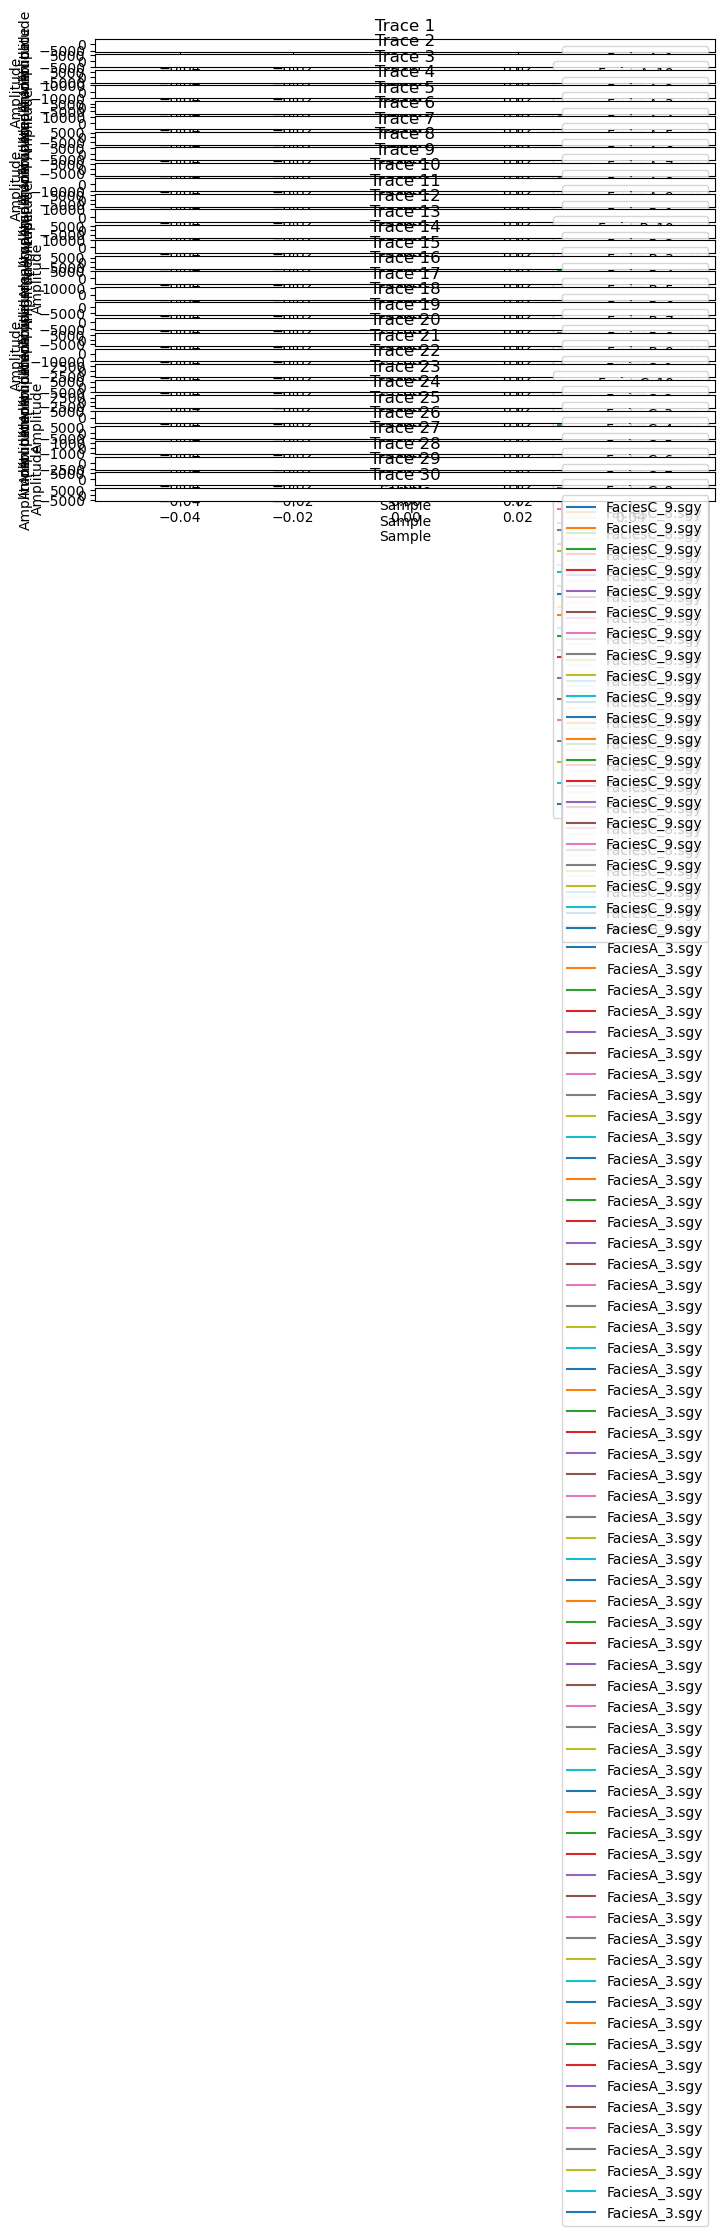

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Loop untuk plotting masing-masing trace secara berbaris ke bawah
for idx, trace in enumerate(seismic_traces):
    plt.subplot(len(seismic_traces), 1, idx + 1)
    plt.plot(trace, label=file_list[idx])
    plt.title(f"Trace {idx + 1}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

In [3]:
## Berisi matriks kosong untuk menyimpan array hasil running seismic attribute

instantaneous_phase = []
cosine_phase = []

In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import convolve


## Mendefinisikan fungsi seismic attribute

def att_instan_phase(data):
    fourier_transform = np.fft.fft(data)
    magnitude_spectrum = np.abs(fourier_transform)
    phase_spectrum = np.angle(fourier_transform)
    instantaneous_phase = np.unwrap(phase_spectrum)
    return instantaneous_phase 

def att_cosine_phase(data):
    spectrum = np.fft.fft(data)
    phase = np.angle(spectrum)
    cosine_phase = np.cos(phase)
    return cosine_phase

def att_max_curvature(data, window_size):
    # Apply Gaussian smoothing
    smoothed_data = gaussian_filter1d(data, sigma=1)

    # Calculate first and second derivatives
    gradient = np.gradient(smoothed_data)
    max_curvature = np.gradient(gradient)

    # Convolve with a window to further smooth the curvature
    max_curvature = convolve(max_curvature, np.ones(window_size)/window_size, mode='full')
    return max_curvature

def att_local_flatness(data, window_size):
    # Apply Gaussian smoothing
    smoothed_data = gaussian_filter1d(data, sigma=1)

    # Calculate first and second derivatives
    gradient = np.gradient(smoothed_data)
    curvature = np.gradient(gradient)

    # Convolve with a window to further smooth the curvature
    curvature = convolve(curvature, np.ones(window_size)/window_size, mode='full')

    # Calculate local flatness
    flatness = np.sqrt(np.sum(curvature**2, axis=0) / len(curvature))
    return flatness

In [5]:
for idx, trace in enumerate(seismic_traces):
    # Running seismic attributes dan menambahkan hasilnya ke dalam array
    instantaneous_phase.append(att_instan_phase(trace))
    cosine_phase.append(att_cosine_phase(trace))
    #max_curvature.append(att_max_curvature(trace, 10))
    #local_flatness.append(att_local_flatness(trace, 10))

In [6]:
print(instantaneous_phase)

[array([[  0.        ,  -1.06862746,  -1.12565111,  -3.2563753 ,
         -3.99142675,  -5.84009862,  -4.86571326,  -7.84521453,
         -4.76610943,  -7.02988007,  -5.50377583,  -7.06259478,
         -5.53649055,  -7.80026119,  -4.72115608,  -7.70065736,
         -6.72627199,  -8.57494387,  -9.30999532, -11.4407195 ,
        -11.49774316]]), array([[ 0.        ,  0.80487858,  1.38545919,  3.61012123,  3.60745128,
         5.93967068,  6.8241382 ,  3.89829666,  5.95230903,  4.35364462,
         3.83961518,  2.44357013,  1.92954069,  0.33087628,  2.38488865,
        -0.5409529 ,  0.34351463,  2.67573402,  2.67306408,  4.89772612,
         5.47830673]]), array([[ 0.        ,  0.10103239,  0.25025702,  0.22538777, -0.99248636,
        -3.90300202, -3.66010668, -4.02220607, -2.04301409,  1.076501  ,
         3.08832695,  3.19485836,  5.20668431,  8.3261994 , 10.30539137,
         9.94329198, 10.18618732,  7.27567167,  6.05779754,  6.03292829,
         6.18215292]]), array([[-6.61131707e-1

In [7]:
import numpy as np
from scipy.stats import scoreatpercentile

# Inisialisasi list untuk menyimpan hasil statistik
statistics_array = []

# Loop untuk menghitung statistik untuk masing-masing array
for phase_array in instantaneous_phase:
    # Menghitung percentiles
    ph_percentile_20 = scoreatpercentile(phase_array, 20)
    ph_percentile_80 = scoreatpercentile(phase_array, 80)
    
    # Menghitung mean, standard deviation, dan standard error of the mean
    ph_mean_value = np.mean(phase_array)
    ph_std_dev_value = np.std(phase_array)
    ph_std_error_value = ph_std_dev_value / np.sqrt(len(phase_array))
    
    # Menyimpan hasil ke dalam list
    statistics_array.append([ph_percentile_20, ph_percentile_80, ph_mean_value, ph_std_dev_value, ph_std_error_value])

# Mengubah list menjadi array numpy
statistics_array = np.array(statistics_array)

In [8]:
print(statistics_array)

[[-7.84521453e+00 -3.99142675e+00 -5.98398601e+00  3.00977447e+00
   3.00977447e+00]
 [ 8.04878579e-01  4.89772612e+00  2.99199300e+00  2.08166617e+00
   2.08166617e+00]
 [-9.92486361e-01  7.27567167e+00  2.99199300e+00  4.64200827e+00
   4.64200827e+00]
 [ 7.29169686e+00  1.14409207e+01  9.33146333e+00  4.30114687e+00
   4.30114687e+00]
 [ 7.13041229e+00  2.77515224e+01  1.81015577e+01  1.02350170e+01
   1.02350170e+01]
 [ 3.21167785e+00  2.81442014e+01  1.51095647e+01  1.07467737e+01
   1.07467737e+01]
 [-6.78162481e-02  6.35100156e+00  2.99199300e+00  3.14973648e+00
   3.14973648e+00]
 [ 4.75044330e+00  2.43050336e+01  1.51095647e+01  8.91808328e+00
   8.91808328e+00]
 [ 3.53203219e+00  8.60498948e+00  6.13358566e+00  2.53765446e+00
   2.53765446e+00]
 [-1.87496922e+00  1.87496922e+00 -1.05735526e-17  2.42187019e+00
   2.42187019e+00]
 [-2.11791818e+01 -2.09281236e+00 -1.19679720e+01  9.09445224e+00
   9.09445224e+00]
 [ 1.30134347e+00  4.79606749e+00  2.99199300e+00  2.22408663e+00

In [20]:
import pandas as pd

df_instan_phase = pd.DataFrame(statistics_array, columns=['20_Percentile', '80_Percentile', 'Mean', 'STD', 'SE'])
print(df_instan_phase)

    20_Percentile  80_Percentile          Mean        STD         SE
0       -7.845215      -3.991427 -5.983986e+00   3.009774   3.009774
1        0.804879       4.897726  2.991993e+00   2.081666   2.081666
2       -0.992486       7.275672  2.991993e+00   4.642008   4.642008
3        7.291697      11.440921  9.331463e+00   4.301147   4.301147
4        7.130412      27.751522  1.810156e+01  10.235017  10.235017
5        3.211678      28.144201  1.510956e+01  10.746774  10.746774
6       -0.067816       6.351002  2.991993e+00   3.149736   3.149736
7        4.750443      24.305034  1.510956e+01   8.918083   8.918083
8        3.532032       8.604989  6.133586e+00   2.537654   2.537654
9       -1.874969       1.874969 -1.057355e-17   2.421870   2.421870
10     -21.179182      -2.092812 -1.196797e+01   9.094452   9.094452
11       1.301343       4.796067  2.991993e+00   2.224087   2.224087
12      -1.540441       1.761423  1.495997e-01   1.967289   1.967289
13       4.703729      12.047278  

In [22]:
import numpy as np
from scipy.stats import scoreatpercentile

# Inisialisasi list untuk menyimpan hasil statistik
statistics_array2 = []

# Loop untuk menghitung statistik untuk masing-masing array
for cos_array in cosine_phase:
    # Menghitung percentiles
    cos_percentile_20 = scoreatpercentile(cos_array, 20)
    cos_percentile_80 = scoreatpercentile(cos_array, 80)
    
    # Menghitung mean, standard deviation, dan standard error of the mean
    cos_mean_value = np.mean(cos_array)
    cos_std_dev_value = np.std(cos_array)
    cos_std_error_value = cos_std_dev_value / np.sqrt(len(cos_array))
    
    # Menyimpan hasil ke dalam list
    statistics_array2.append([cos_percentile_20, cos_percentile_80, cos_mean_value, cos_std_dev_value, cos_std_error_value])

# Mengubah list menjadi array numpy
statistics_array2 = np.array(statistics_array2)

In [23]:
print(statistics_array2)

[[ 0.00876699  0.73393785  0.22116898  0.59467652  0.59467652]
 [-0.76611462  0.94157676  0.04686131  0.77708019  0.77708019]
 [-0.72386435  0.97470752  0.07399376  0.80075586  0.80075586]
 [-0.82958786  0.59684249 -0.14026562  0.6507775   0.6507775 ]
 [-0.97057558  0.66206392 -0.14133165  0.76943073  0.76943073]
 [-0.99754504  0.92207536 -0.09373428  0.82224005  0.82224005]
 [-0.46435656  0.99308798  0.40876886  0.73624054  0.73624054]
 [-0.8690045   0.54208664 -0.22462428  0.61523506  0.61523506]
 [-0.97846524  0.02057387 -0.32186747  0.58430586  0.58430586]
 [-0.33458374  0.37711298 -0.03989428  0.42222732  0.42222732]
 [-0.49862868  0.99664664  0.30649374  0.70311468  0.70311468]
 [-0.96213328  0.51562269 -0.21672593  0.70648131  0.70648131]
 [-0.98689523  0.80522799  0.04572695  0.77673624  0.77673624]
 [-0.92990365  0.56909181 -0.17938657  0.73015757  0.73015757]
 [-0.99885624  0.70613457 -0.23486217  0.75561624  0.75561624]
 [-0.51959726  0.99430274  0.10741236  0.73347719  0.73

In [24]:
import pandas as pd

df_cosine_phase = pd.DataFrame(statistics_array2, columns=['20_Percentile', '80_Percentile', 'Mean', 'STD', 'SE'])
print(df_cosine_phase)

    20_Percentile  80_Percentile      Mean       STD        SE
0        0.008767       0.733938  0.221169  0.594677  0.594677
1       -0.766115       0.941577  0.046861  0.777080  0.777080
2       -0.723864       0.974708  0.073994  0.800756  0.800756
3       -0.829588       0.596842 -0.140266  0.650777  0.650777
4       -0.970576       0.662064 -0.141332  0.769431  0.769431
5       -0.997545       0.922075 -0.093734  0.822240  0.822240
6       -0.464357       0.993088  0.408769  0.736241  0.736241
7       -0.869004       0.542087 -0.224624  0.615235  0.615235
8       -0.978465       0.020574 -0.321867  0.584306  0.584306
9       -0.334584       0.377113 -0.039894  0.422227  0.422227
10      -0.498629       0.996647  0.306494  0.703115  0.703115
11      -0.962133       0.515623 -0.216726  0.706481  0.706481
12      -0.986895       0.805228  0.045727  0.776736  0.776736
13      -0.929904       0.569092 -0.179387  0.730158  0.730158
14      -0.998856       0.706135 -0.234862  0.755616  0

In [25]:
result_df = pd.merge(df_instan_phase, df_cosine_phase, how='outer')
print(result_df)

    20_Percentile  80_Percentile          Mean        STD         SE
0       -7.845215      -3.991427 -5.983986e+00   3.009774   3.009774
1        0.804879       4.897726  2.991993e+00   2.081666   2.081666
2       -0.992486       7.275672  2.991993e+00   4.642008   4.642008
3        7.291697      11.440921  9.331463e+00   4.301147   4.301147
4        7.130412      27.751522  1.810156e+01  10.235017  10.235017
5        3.211678      28.144201  1.510956e+01  10.746774  10.746774
6       -0.067816       6.351002  2.991993e+00   3.149736   3.149736
7        4.750443      24.305034  1.510956e+01   8.918083   8.918083
8        3.532032       8.604989  6.133586e+00   2.537654   2.537654
9       -1.874969       1.874969 -1.057355e-17   2.421870   2.421870
10     -21.179182      -2.092812 -1.196797e+01   9.094452   9.094452
11       1.301343       4.796067  2.991993e+00   2.224087   2.224087
12      -1.540441       1.761423  1.495997e-01   1.967289   1.967289
13       4.703729      12.047278  

In [26]:
result_df.to_excel('facies_class.xlsx', index=False)